# Machine Learning (laboratory instruction)
## Linear regression (part 3)

### Submission

<u>Submission:</u>

Compress all files into **single zip** archive and submit via Wikamp. See below the content of the archive (replace the `name` and `surname` with proper values):
```
📂 name.surname.zip
+-- 📜 02-Linear regression (part 3).ipynb
+-- 🖼 dataset.npz
```

<u>Grades</u>

| Percentage of all points | mark |
| :----                    | ---: |
| [0-50)   | 2   |
| [50-60)  | 3   |
| [60-70)  | 3.5 |
| [70-80)  | 4   |
| [80-90)  | 4.5 |
| [90-100] | 5   |

<u>Penalties</u>

* `mark - 0.5` if tasks are submitted after laboratory (but less than 7 days); 
* `mark - 1` if tasks are submitted after one week (>=7 days but < 14 days);
* `mark - 1.5` if tasks are submitted later than two weeks (>=14 days).

<u>Warning:</u>

It is NOT allowed to share your .ipynb file with other students nor Internet. All students should download the exercise files directly from WIKAMP. Group work is considered as plagiarism.

<u>Plagiarism Disclaimer:</u>

I hereby declare that this exercise is my own and autonomous work. I am aware of the consequences and I am familiar with the university regulations.

### The goal
Your goal is to implement the regression algorithm that will be able to predict the weekly employee salary.

### Task 1. Read the dataset from file.
Read the data from `dataset.npz` file. This is a univariate data with information about the weekly salary of the employees. The function of the data is unknown.

**Tip**: You can use below code to read the data:

```python
with open('dataset.npz', 'rb') as f:
    data = np.load(f)
    x, y = data['x'], data['y']
```

In [1]:
# >>> WRITE YOUR CODE IN THIS CELL <<<
import numpy as np
import matplotlib.pyplot as plt
with open('dataset.npz', 'rb') as f:
    data = np.load(f)
    x, y = data['x'], data['y']

### Task 2. Display the data.

Display the data and try to guess what function approximates the data.

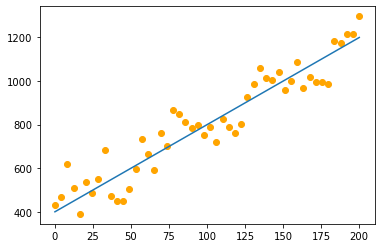

In [2]:
# >>> WRITE YOUR CODE IN THIS CELL <<<
plt.scatter(x, y, color='orange')

approx = 4*x + 400
plt.plot(x, approx)

### Task 3. Implement the function.
Implement function $f$ that approximates the data. The $a$ and $b$ are the hyperparameters of the function.

$$
f(x) = ax + b
$$

In [3]:
# >>> WRITE YOUR CODE IN THIS CELL <<<
def f(x, a, b):
    return a * x + b

### Task 4. Implement cost function.

Implement mean squared error (MSE) function and its derivatives with respect to hyperparameters of the function $f$ (implemented in previous task). This is the cost function that you will have to minimize.

* MSE formula:
    $MSE = \frac{1}{m}\sum(f(x) - y)^2$

* MSE derivative:
    $MSE' = \frac{2}{m}\sum(f(x) - y)$

* MSE partial derivatives (if $f(x) = ax + b$):
    * $MSE'(a) = \frac{2}{m}\sum(f(x) - y)x$
    * $MSE'(b) = \frac{2}{m}\sum(f(x) - y)$


In [4]:
# >>> WRITE YOUR CODE IN THIS CELL <<<
def mse(predicted, true):
    return np.square(np.subtract(predicted, true)).mean()

def mse_partial(x, predicted, true):
    df_a = 2 * (np.subtract(predicted, true) * x).mean()
    df_b = 2 * np.subtract(predicted, true).mean()
    return np.array([df_a, df_b])

### Task 5. Train the model.

Train the model using Gradient Descent algorithm. Find proper learning rate $\alpha$ (if the cost function is growing it means that the learning rage is too high, try to decrease it).

*Note: Training may take time. Do not hesitate to set the number of iterations to high value e.g. 50000.*

final_error: 6283.344814179674, func = 3.81970x+423.08037


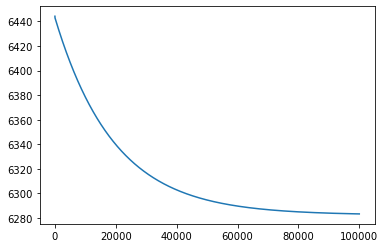

In [5]:
# >>> WRITE YOUR CODE IN THIS CELL <<<

history = []
coeffs = np.array([4.0, 400.0])
lr = 5e-5

for i in range(100000):
    prediction = f(x, *coeffs)
    error = mse(prediction, y)
    coeffs -= lr * mse_partial(x, prediction, y)
    history.append(error)

plt.plot(history)
a, b = coeffs
print(f'final_error: {history[-1]}, func = {a:.5f}x+{b:.5f}')
plt.show()


### Task 6. Display the results.
Display the data and function on the same chart.

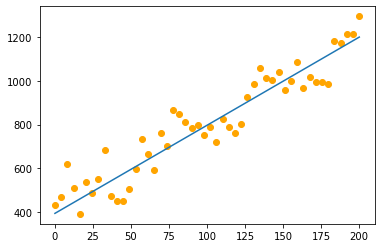

In [84]:
# >>> WRITE YOUR CODE IN THIS CELL <<<
plt.scatter(x, y, color='orange')

approx = a*x + b
plt.plot(x, approx)

### Task 7. Prediction.
Predict at least 3 results for different numbers. Present the prediction and original data (with different colors) at the same chart.

Example:

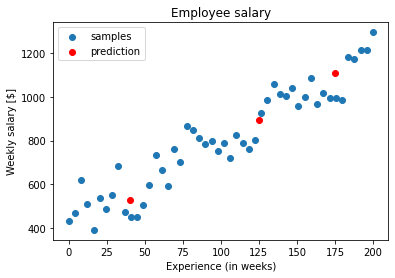

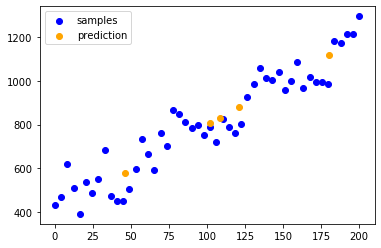

In [93]:
# >>> WRITE YOUR CODE IN THIS CELL <<<
plt.scatter(x, y, color='blue', label='samples')

rand_x = np.random.uniform(low=x[0], high=x[-1], size=(5,))

approx = a*rand_x + b
plt.scatter(rand_x, approx, color='orange', label='prediction')
plt.legend()
plt.show()